# Модуль 1. Разведоточный анализ данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('patient_segmentation_dataset.csv')
df.head()

,PatientID,Age,Gender,State,City,Height_cm,Weight_kg,BMI,Insurance_Type,Primary_Condition,Num_Chronic_Conditions,Annual_Visits,Avg_Billing_Amount,Last_Visit_Date,Days_Since_Last_Visit,Preventive_Care_Flag
0,P10000,64,Male,GA,Unknown,151,115,50.4,Private,Arthritis,3,7,2995.0,2025-07-18,186,0
1,P10001,59,Male,OH,Unknown,189,68,19.0,Medicare,Depression,1,8,1209.0,2025-12-12,39,0
2,P10002,58,Female,PA,Unknown,156,91,37.4,Private,Asthma,1,4,999.0,2025-09-16,126,0
3,P10003,43,Female,GA,Unknown,152,92,39.8,Medicare,Hypertension,1,6,5638.5,2025-04-09,286,1
4,P10004,53,Female,NC,Unknown,167,51,18.3,Medicaid,Asthma,1,4,5796.0,2025-03-07,319,0


В датасете представлен список из 20000 пациентов с их личныии данными и историей болезней,целью работы составляет разделить людей на группы.

In [3]:
df.sample(10)

,PatientID,Age,Gender,State,City,Height_cm,Weight_kg,BMI,Insurance_Type,Primary_Condition,Num_Chronic_Conditions,Annual_Visits,Avg_Billing_Amount,Last_Visit_Date,Days_Since_Last_Visit,Preventive_Care_Flag
1030,P11030,75,Female,NY,New York,168,96,34.0,Medicare,Arthritis,3,11,3180.0,2025-12-03,48,0
502,P10502,49,Male,MI,Unknown,157,105,42.6,Private,Obesity,1,5,1237.5,2026-01-03,17,0
655,P10655,38,Female,PA,Unknown,165,67,24.6,Medicare,NaN,0,4,4102.0,2025-03-27,299,0
1601,P11601,47,Male,PA,Unknown,159,94,37.2,Private,Diabetes,1,2,3499.5,2025-10-01,111,0
1043,P11043,69,Male,TX,Dallas,162,105,40.0,Medicare,Diabetes,3,5,4250.0,2025-03-05,321,1
692,P10692,59,Female,PA,Unknown,170,71,24.6,Medicaid,COPD,1,5,2187.0,2025-04-26,269,1
938,P10938,36,Male,PA,Unknown,160,67,26.2,Medicare,NaN,0,1,3105.0,2025-07-04,200,0
1292,P11292,71,Female,NC,Unknown,177,53,16.9,Medicare,Hypertension,1,12,2085.0,2025-10-07,105,0
1899,P11899,65,Female,FL,Miami,148,100,45.7,Medicare,Obesity,1,5,1050.0,2025-10-14,98,0
649,P10649,54,Female,FL,Miami,146,89,41.8,Medicare,Obesity,1,10,6540.0,2025-01-23,362,0


Просмотрели 10 случайных запиисей для проверки данных на возможные аномалия.

## Описание признаков

PatientID - уникальный идентификационный номер пациента.

Age - возраст пациента.

Gender - пол пациента.

State - штат, где проживает пациент.

City - город, гле проживет пациент.

Height_cm - рост пациента, измеряется в сантиметрах.

Weight_kg - вес пациента, измеряется в килограммах.

BMI - индекс массы тела, измеряется в отношение роста к массы телу.

Insurance_Type - тип страхования.

Primary_Condition - первичное состояние.

Num_Chronic_Conditions - хроническое заболевание.

Annual_Visits - ежегодные посещения.

Avg_Billing_Amount - среднее сумма счета в долларах.

Last_Visit_Date - последняя дата визита.

Days_Since_Last_Visit - количество дней, которое прошло с последнего визита.

Preventive_Care_Flag - флажок профилактической помощи

## Проверка на пропущенные данные

In [4]:
df.isnull().sum()

PatientID                   0
Age                         0
Gender                      0
State                       0
City                        0
Height_cm                   0
Weight_kg                   0
BMI                         0
Insurance_Type              0
Primary_Condition         495
Num_Chronic_Conditions      0
Annual_Visits               0
Avg_Billing_Amount          0
Last_Visit_Date             0
Days_Since_Last_Visit       0
Preventive_Care_Flag        0
dtype: int64

In [5]:
# увидели, что в столбце Primary_Condition есть 495  пропусков,заменим их как наиболее встречаемом значением
df['Primary_Condition'] = df['Primary_Condition'].fillna(df['Primary_Condition'].mode()[0])

In [6]:
df.isnull().sum()

PatientID                 0
Age                       0
Gender                    0
State                     0
City                      0
Height_cm                 0
Weight_kg                 0
BMI                       0
Insurance_Type            0
Primary_Condition         0
Num_Chronic_Conditions    0
Annual_Visits             0
Avg_Billing_Amount        0
Last_Visit_Date           0
Days_Since_Last_Visit     0
Preventive_Care_Flag      0
dtype: int64

In [7]:
#Так как мы видим,что в нашеи датасете, есть колонка 'city' и проглядывается очень много,
#как неизвестных значений, то отнесем этот признак, как ненужный и удалим его.
df = df.drop(columns=['City'])

In [8]:
df.head()

,PatientID,Age,Gender,State,Height_cm,Weight_kg,BMI,Insurance_Type,Primary_Condition,Num_Chronic_Conditions,Annual_Visits,Avg_Billing_Amount,Last_Visit_Date,Days_Since_Last_Visit,Preventive_Care_Flag
0,P10000,64,Male,GA,151,115,50.4,Private,Arthritis,3,7,2995.0,2025-07-18,186,0
1,P10001,59,Male,OH,189,68,19.0,Medicare,Depression,1,8,1209.0,2025-12-12,39,0
2,P10002,58,Female,PA,156,91,37.4,Private,Asthma,1,4,999.0,2025-09-16,126,0
3,P10003,43,Female,GA,152,92,39.8,Medicare,Hypertension,1,6,5638.5,2025-04-09,286,1
4,P10004,53,Female,NC,167,51,18.3,Medicaid,Asthma,1,4,5796.0,2025-03-07,319,0


## Проверка дублирования, вывод статистики

In [9]:
df.duplicated().value_counts()

False    2000
Name: count, dtype: int64

In [10]:
df.shape

(2000, 15)

Видим,что у нету дубликатов, значит можем не беспокоиться, что будут дублироваться значения.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               2000 non-null   object 
 1   Age                     2000 non-null   int64  
 2   Gender                  2000 non-null   object 
 3   State                   2000 non-null   object 
 4   Height_cm               2000 non-null   int64  
 5   Weight_kg               2000 non-null   int64  
 6   BMI                     2000 non-null   float64
 7   Insurance_Type          2000 non-null   object 
 8   Primary_Condition       2000 non-null   object 
 9   Num_Chronic_Conditions  2000 non-null   int64  
 10  Annual_Visits           2000 non-null   int64  
 11  Avg_Billing_Amount      2000 non-null   float64
 12  Last_Visit_Date         2000 non-null   object 
 13  Days_Since_Last_Visit   2000 non-null   int64  
 14  Preventive_Care_Flag    2000 non-null   

Вывели информацию по нашему датасету, видим ,что сейчас все значения на месте, нету пропущенных значений.Почти все признаки представляют собой числовой тип данных(int64,float64), также видии, что есть два признака с типой данных object(PatientID,Last_Visit_Date,Gender,State,Insurance_Type,Primary_Condition).

In [12]:
df.describe()

,Age,Height_cm,Weight_kg,BMI,Num_Chronic_Conditions,Annual_Visits,Avg_Billing_Amount,Days_Since_Last_Visit,Preventive_Care_Flag
count,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,50.69550,167.907500,85.143500,30.740650,1.080000,5.466500,4000.270500,180.085000,0.464000
std,15.44445,12.684494,20.385428,8.839952,0.890504,3.485965,2463.239215,104.688484,0.498827
min,18.00000,145.000000,50.000000,13.400000,0.000000,1.000000,207.000000,1.000000,0.000000
25%,40.00000,158.000000,67.000000,23.800000,1.000000,3.000000,2061.000000,90.000000,0.000000
50%,51.00000,168.000000,86.000000,30.100000,1.000000,4.000000,3707.250000,183.000000,0.000000
75%,63.25000,177.000000,103.000000,37.025000,1.000000,8.000000,5650.875000,268.000000,1.000000
max,87.00000,195.000000,120.000000,57.100000,3.000000,12.000000,12467.500000,365.000000,1.000000


По данной статистики видим некотрые значения:

Возраст: В среднем пациентам около 51 года, что говорит нам, о том что это не молодежный датасет,а более взрослый и трудоспособный.

Вес и здровье: Средний индекс массы тела(BMI) - 31.По медицинской форме, что выше 30, то значит у пациента уже есть ожирение.Значит большая часть пациентов имеет ожирение.

Деньги: Средний визит или курс лечения обходиться 4000, но есть высокие, так и низкие. Значит, бывают так и простые болезни так и дорогие операции.

## Построения тепловой карты 

In [13]:
df.head()

,PatientID,Age,Gender,State,Height_cm,Weight_kg,BMI,Insurance_Type,Primary_Condition,Num_Chronic_Conditions,Annual_Visits,Avg_Billing_Amount,Last_Visit_Date,Days_Since_Last_Visit,Preventive_Care_Flag
0,P10000,64,Male,GA,151,115,50.4,Private,Arthritis,3,7,2995.0,2025-07-18,186,0
1,P10001,59,Male,OH,189,68,19.0,Medicare,Depression,1,8,1209.0,2025-12-12,39,0
2,P10002,58,Female,PA,156,91,37.4,Private,Asthma,1,4,999.0,2025-09-16,126,0
3,P10003,43,Female,GA,152,92,39.8,Medicare,Hypertension,1,6,5638.5,2025-04-09,286,1
4,P10004,53,Female,NC,167,51,18.3,Medicaid,Asthma,1,4,5796.0,2025-03-07,319,0


In [14]:
df_temp = df.copy()

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
colums_to_encode = ['Gender','Insurance_Type','Primary_Condition', 'State']
for col in colums_to_encode:
    df_temp[col] = le.fit_transform(df_temp[col])
df_temp.head()

,PatientID,Age,Gender,State,Height_cm,Weight_kg,BMI,Insurance_Type,Primary_Condition,Num_Chronic_Conditions,Annual_Visits,Avg_Billing_Amount,Last_Visit_Date,Days_Since_Last_Visit,Preventive_Care_Flag
0,P10000,64,1,2,151,115,50.4,2,1,3,7,2995.0,2025-07-18,186,0
1,P10001,59,1,7,189,68,19.0,1,4,1,8,1209.0,2025-12-12,39,0
2,P10002,58,0,8,156,91,37.4,2,2,1,4,999.0,2025-09-16,126,0
3,P10003,43,0,2,152,92,39.8,1,7,1,6,5638.5,2025-04-09,286,1
4,P10004,53,0,5,167,51,18.3,0,2,1,4,5796.0,2025-03-07,319,0


Провели замену текстовых данных на числовые через LabelEncoder

In [16]:
fuature = ['Age','Gender','Height_cm','Weight_kg','BMI',
           'Insurance_Type','Primary_Condition','Num_Chronic_Conditions','Annual_Visits',
           'Avg_Billing_Amount','Days_Since_Last_Visit','Preventive_Care_Flag']
corr_matrix = df_temp[fuature].corr()
corr_matrix

,Age,Gender,Height_cm,Weight_kg,BMI,Insurance_Type,Primary_Condition,Num_Chronic_Conditions,Annual_Visits,Avg_Billing_Amount,Days_Since_Last_Visit,Preventive_Care_Flag
Age,1.000000,-0.037875,-0.018662,0.026305,0.030859,-0.129953,-0.362211,0.797068,0.366565,0.350142,0.023148,0.118994
Gender,-0.037875,1.000000,0.377517,0.022063,-0.170984,-0.004892,0.044981,-0.025745,-0.057684,-0.040657,-0.045651,-0.039174
Height_cm,-0.018662,0.377517,1.000000,-0.016844,-0.535225,-0.032717,0.020721,-0.016927,-0.039514,-0.011952,-0.032195,-0.019620
Weight_kg,0.026305,0.022063,-0.016844,1.000000,0.842057,-0.007221,-0.047624,0.034723,0.030714,0.037475,-0.029076,0.008109
BMI,0.030859,-0.170984,-0.535225,0.842057,1.000000,0.014027,-0.049970,0.032180,0.040556,0.032210,-0.003841,0.015834
Insurance_Type,-0.129953,-0.004892,-0.032717,-0.007221,0.014027,1.000000,0.059559,-0.077795,-0.034794,-0.061864,-0.029779,-0.036462
Primary_Condition,-0.362211,0.044981,0.020721,-0.047624,-0.049970,0.059559,1.000000,-0.327613,-0.224710,-0.156017,-0.024093,-0.072571
Num_Chronic_Conditions,0.797068,-0.025745,-0.016927,0.034723,0.032180,-0.077795,-0.327613,1.000000,0.336860,0.425172,0.027755,0.113472
Annual_Visits,0.366565,-0.057684,-0.039514,0.030714,0.040556,-0.034794,-0.224710,0.336860,1.000000,0.125944,-0.010451,0.073097
Avg_Billing_Amount,0.350142,-0.040657,-0.011952,0.037475,0.032210,-0.061864,-0.156017,0.425172,0.125944,1.000000,0.001400,0.036312


<Axes: >

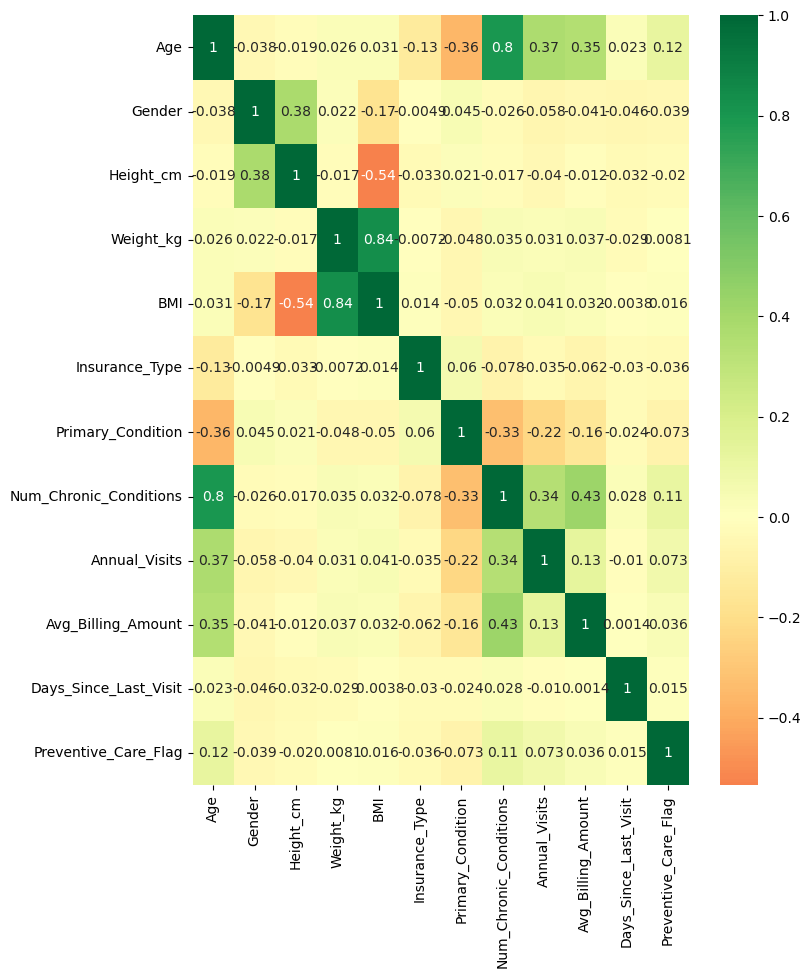

In [17]:
plt.figure(figsize=(8,10))
sns.heatmap(data=corr_matrix,annot=True,cmap='RdYlGn',center=0)

Построили тепловую карту по корреляции, чтобы увидеть, как признаки взаимодействуют друг с другом:

Age — Num_Chronic_Conditions (0.80) - очень сильная положительная связь и оно понятно, чем старше человек,тем больше у него хронических болезней.

Weight_kg — BMI (0.84) - также положительная связь,чем больше вес, тем выше индекс массы тела, это логично, ведь BMI напрямую зависит от веса.

Num_Chronic_Conditions — Avg_Billing_Amount (0.43) - умеренная положительная связь,чем больше хронических заболеваний, тем выше средние медицинские расходы.

Num_Chronic_Conditions — Annual_Visits (0.34) - умеренная связь,люди с большим количеством хронических заболеваний чаще посещают врача.

Age — Annual_Visits (0.37) - умеренная связь, с возрастом количество визитов к врачу увеличивается

Height_cm — BMI (-0.54) - умеренная отрицательная связь, при увеличини роста BMI снижается(при одинаковом месте)

Age — Primary_Condition (-0.36) - умеренная отрицательная связь, с возрастом меняется тип основного заболевания (зависит от кодирования).

## Построение диаграмм

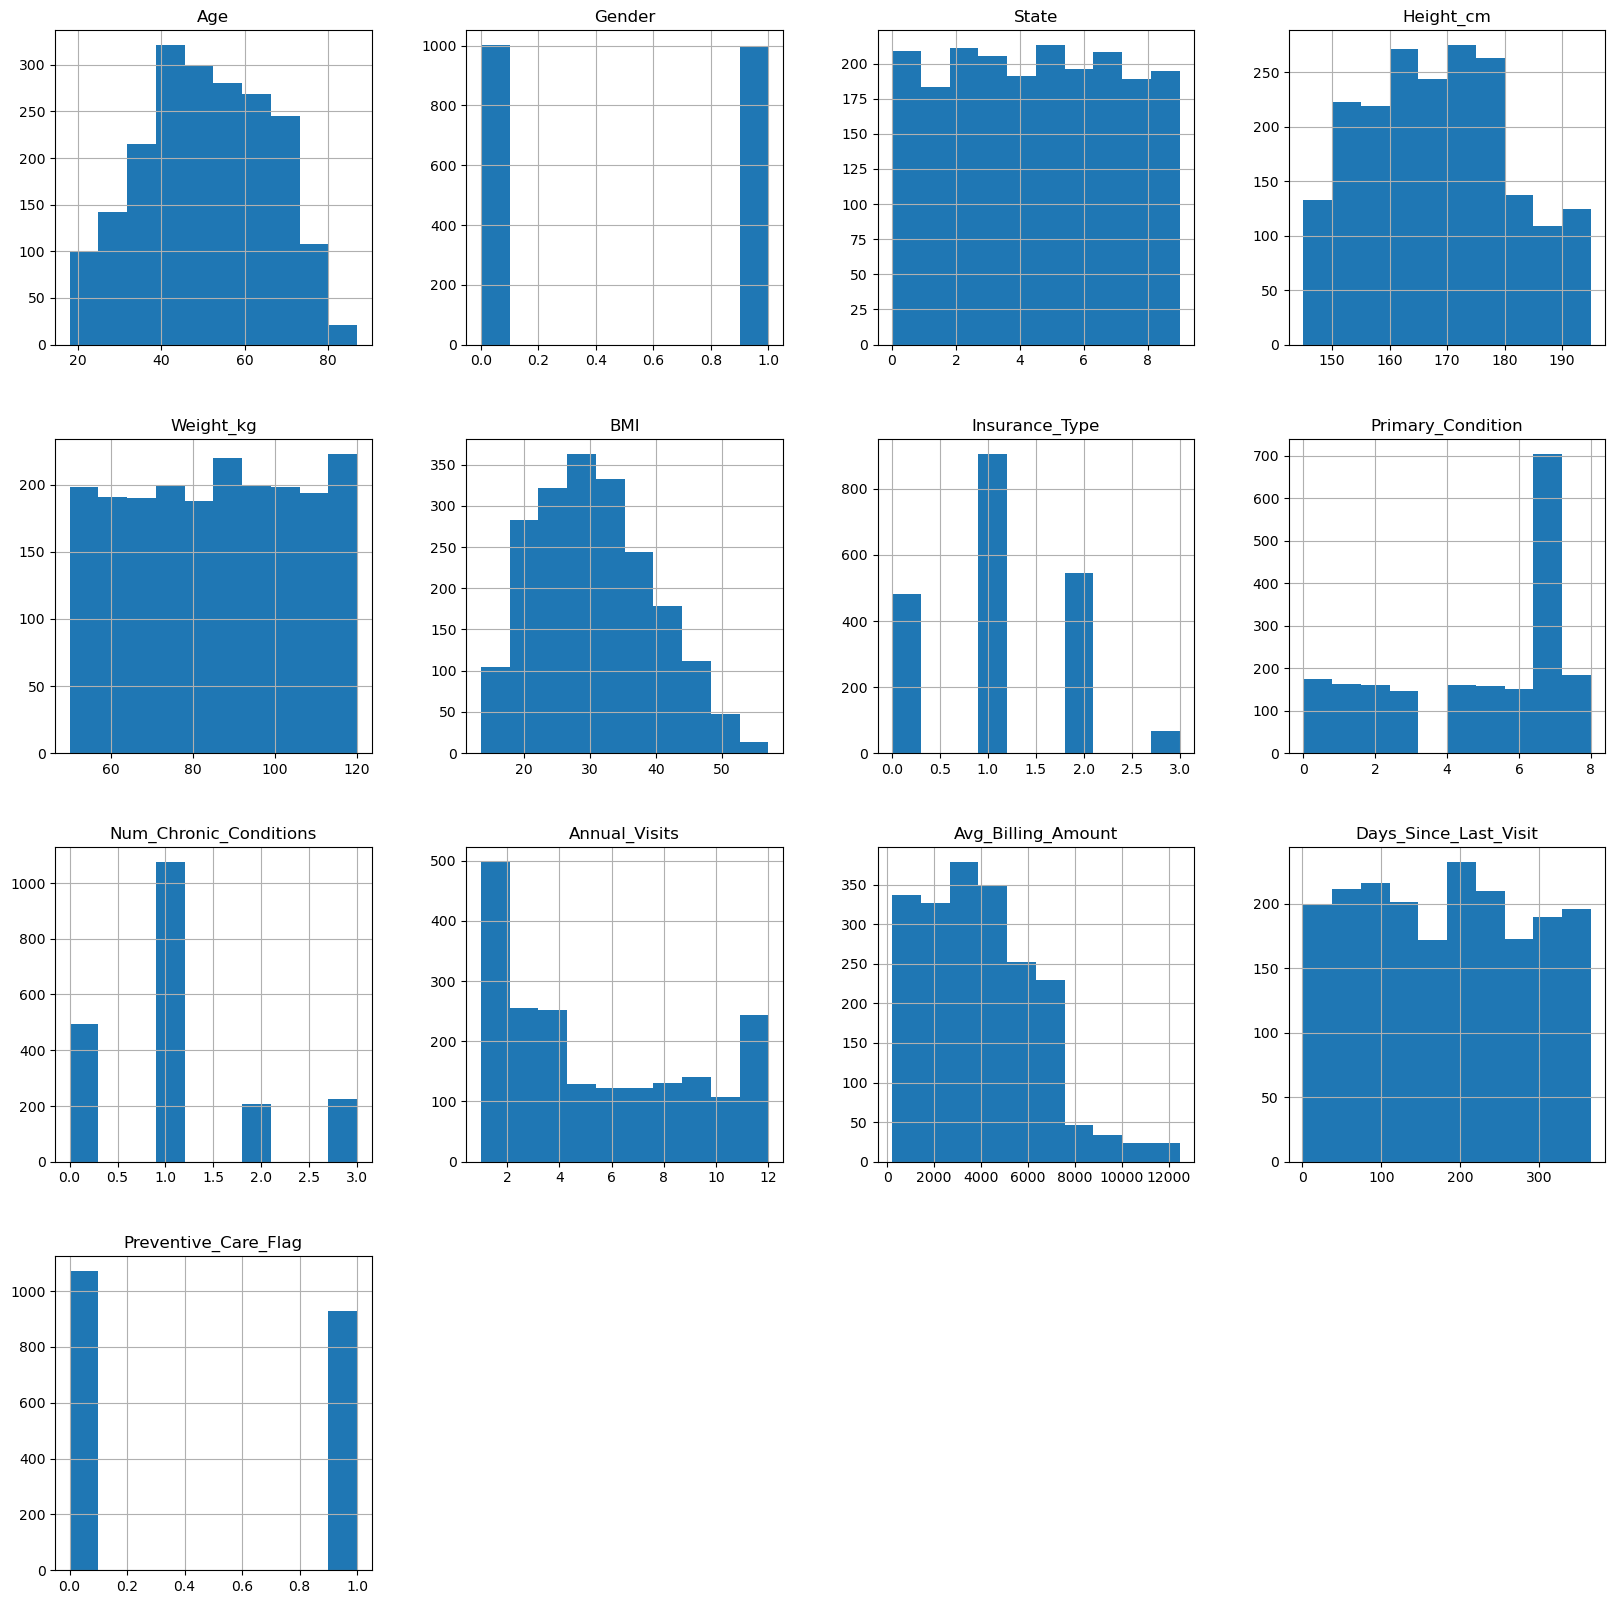

In [18]:
df_temp.hist(figsize=(20,20))
plt.show()

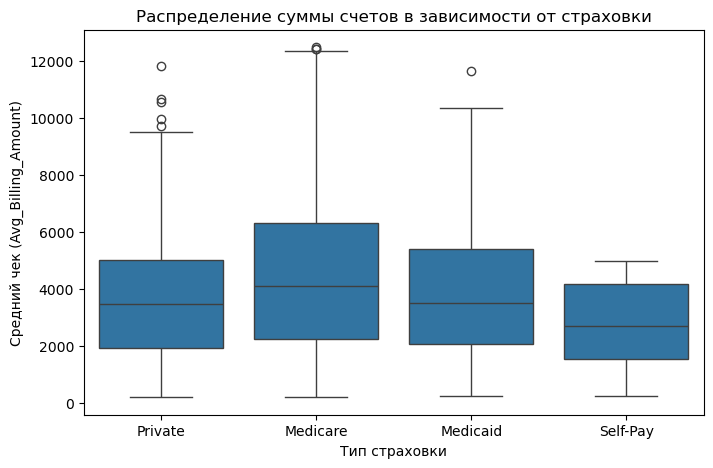

In [19]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Insurance_Type', y='Avg_Billing_Amount', data=df)
plt.title('Распределение суммы счетов в зависимости от страховки')
plt.xlabel('Тип страховки')
plt.ylabel('Средний чек (Avg_Billing_Amount)')
plt.show()

Использование диаграммы boxplot позволяет нам оценить финансовую нагрузку на разные группы пациентов. Мы видим, что медианные значения стоимости лечения (Avg_Billing_Amount) для Medicare, Medicaid и Private-страхования находятся разных уровнях. Наличие точек выше "усов" графика говорит о наличии выбросов — это единичные случаи крайне дорогостоящего лечения, которые могут быть связаны со сложными операциями или длительной госпитализацией

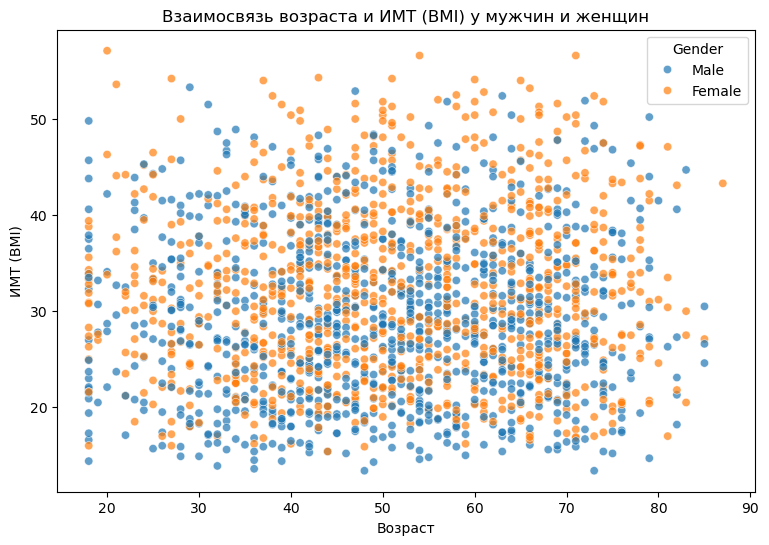

In [20]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='Age', y='BMI', hue='Gender', data=df, alpha=0.7)
plt.title('Взаимосвязь возраста и ИМТ (BMI) у мужчин и женщин')
plt.xlabel('Возраст')
plt.ylabel('ИМТ (BMI)')
plt.show()

С помощью scatterplot мы исследовали антропометрические данные наших пациентов. Визуальный анализ показывает распределение ИМТ (BMI) в разных возрастных группах. Отсутствие явного плотного кластера говорит о том, что в нашей выборке избыточный вес встречается равномерно среди всех возрастов. Цветовая кодировка по полу позволяет подтвердить, что структура распределения ИМТ у мужчин и женщин идентична, что исключает гендерное смещение в этом признаке

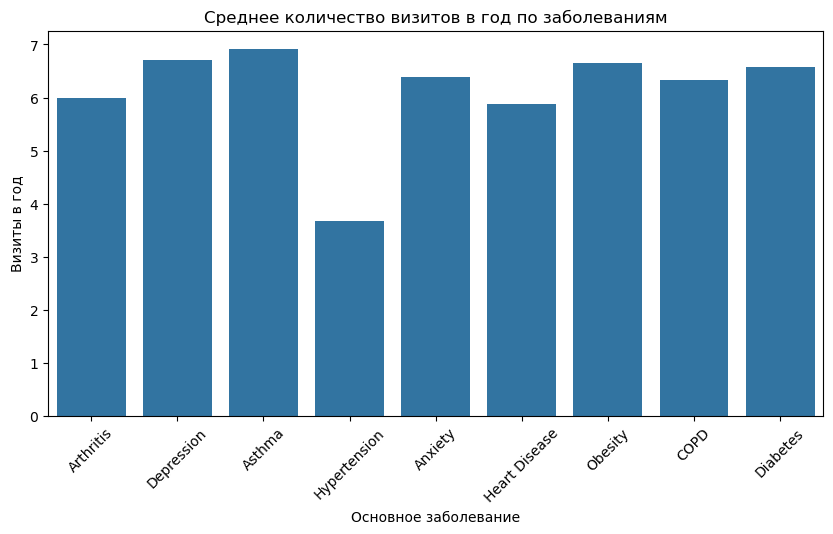

In [62]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Primary_Condition', y='Annual_Visits', data=df, errorbar=None)
plt.title('Среднее количество визитов в год по заболеваниям')
plt.xlabel('Основное заболевание')
plt.ylabel('Визиты в год')
plt.xticks(rotation=45)
plt.show()

Этот график показывает, пациенты с какими диагнозами требуют наиболее частого наблюдения. Это полезно для понимания нагрузки на клинику.

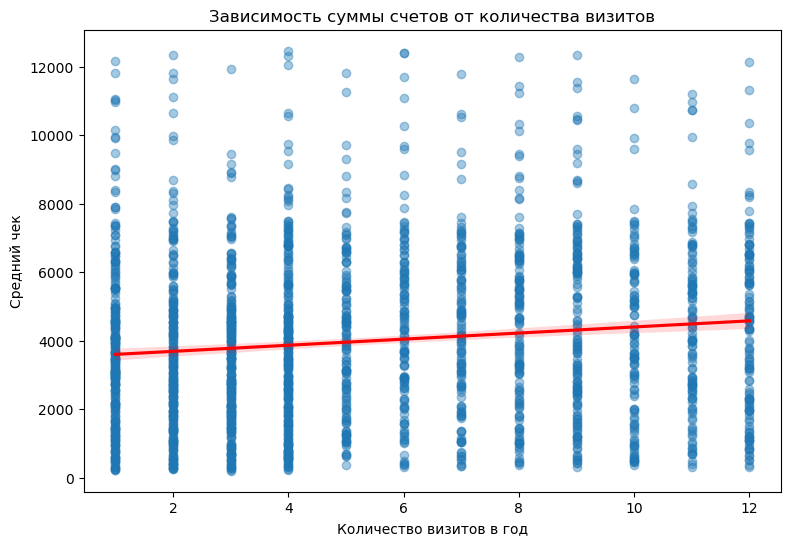

In [22]:
plt.figure(figsize=(9, 6))
sns.regplot(x='Annual_Visits', y='Avg_Billing_Amount', data=df, 
            scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title('Зависимость суммы счетов от количества визитов')
plt.xlabel('Количество визитов в год')
plt.ylabel('Средний чек')
plt.show()

Данный график с линией регрессии проверяет гипотезу о прямой зависимости расходов от частоты посещений. Линия тренда показывает общую направленность: она идет вверх, значит, каждый дополнительный визит увеличивает итоговый чек. Рассеяние точек вокруг линии указывает на вариативность — это значит, что даже при малом количестве визитов стоимость может быть высокой из-за дорогостоящих процедур

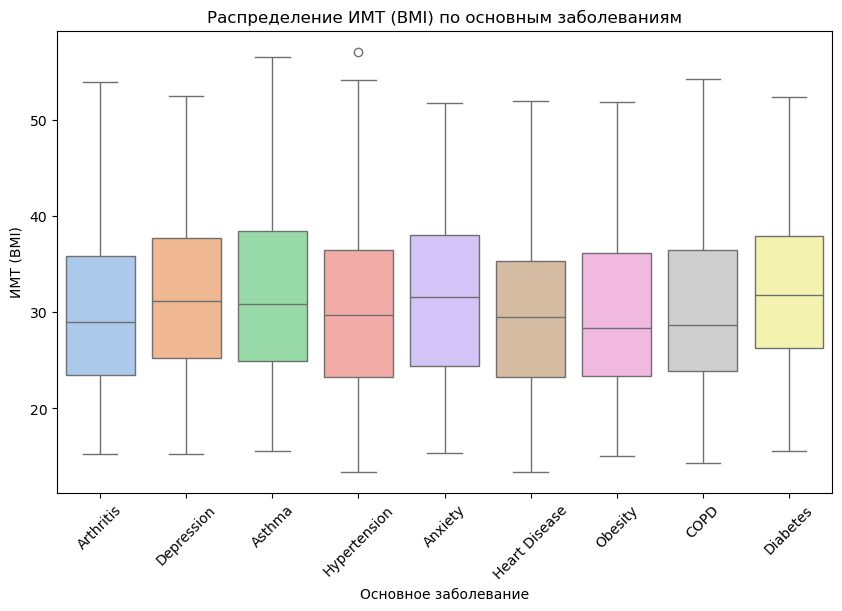

In [63]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Primary_Condition', y='BMI', data=df, hue='Primary_Condition', palette='pastel', legend=False)

plt.title('Распределение ИМТ (BMI) по основным заболеваниям')
plt.xlabel('Основное заболевание')
plt.ylabel('ИМТ (BMI)')
plt.xticks(rotation=45)
plt.show()

Этот график позволяет соотнести физические показатели пациента с его основным диагнозом. Например, мы можем наглядно оценить, отличаются ли медианные показатели ИМТ у пациентов с диабетом, ожирением или сердечно-сосудистыми заболеваниями.

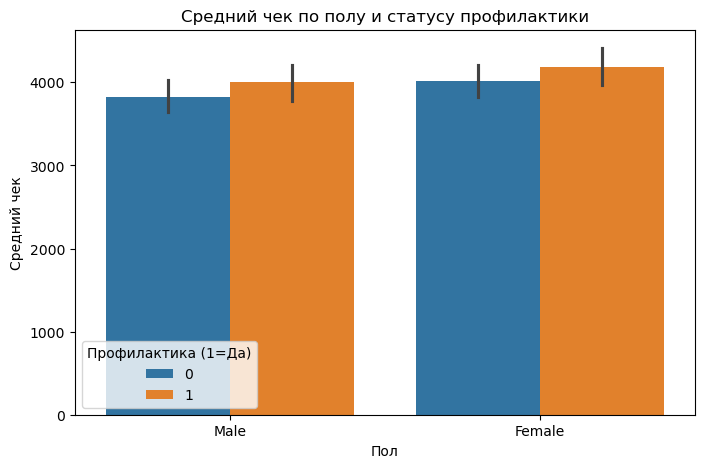

In [24]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Gender', y='Avg_Billing_Amount', hue='Preventive_Care_Flag', data=df)
plt.title('Средний чек по полу и статусу профилактики')
plt.xlabel('Пол')
plt.ylabel('Средний чек')
plt.legend(title='Профилактика (1=Да)')
plt.show()

Здесь мы добавили второе измерение: мы разбили средний чек не только по полу, но и по тому, проходит ли пациент профилактику. Так мы можем узнать, помогает ли профилактика снизить общие затраты на лечение для разных полов.

## Вывод по модулю

В данном модуле разведоточный анализ данных, было проведелано загрузка основных библиотек для работы с данными, после заргузки библиотек, была осущестлена загрузка cvs файла и видим, что это данные из больницы и вывели первые 5 строк.Далее расписали значение признаков.Провели на пустые значения,увидели, что есть пустые значения и исправили. Далее просмотрели дубликаты,информацию и статистику про датасет.После начали строить тепловую карту, но для начала создали копию датасета и превратили строковые признаки в числовые, чтоб увидеть больше взаимосвязывающих признаков между друг другом.Завершающим,начали строить графики, чтоб наглядно показать, как некоторые признаки взаимодействуют друг с другом.

# Модуль 2. Кластеризация (3 метода), метрики, визуализация.

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.mixture import GaussianMixture
fuature = ['Age','Gender','Height_cm','Weight_kg','BMI',
           'Insurance_Type','Primary_Condition','Num_Chronic_Conditions','Annual_Visits',
           'Avg_Billing_Amount','Days_Since_Last_Visit','Preventive_Care_Flag']
X = df_temp[fuature]
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

Первым делом подключили библиотеки, после взяли признаки, по которымм будем делать кластеризацию, провели стандартизацию для получения в одному типу значений по нашим взятым признакам.

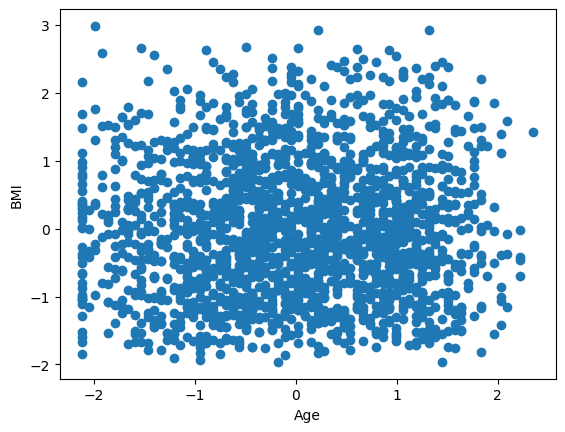

In [26]:
plt.scatter(X_scaler[:,0],X_scaler[:,4])
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

Построили график расположение точек в нашем случае взяли BMI и Age, как возраст влияет на индекс массы тела в будем по этим расположением будет смотреть как по этим признак распределяют кластеры.

## Kmeans

In [27]:
import warnings
warnings.filterwarnings('ignore')
n_cl = 3 
kmeans = KMeans(n_clusters=n_cl,random_state=42).fit(X_scaler)
df['cluster_kmeans'] = kmeans.labels_
df_temp['cluster_kmeans'] = kmeans.labels_
df.head()

,PatientID,Age,Gender,State,Height_cm,Weight_kg,BMI,Insurance_Type,Primary_Condition,Num_Chronic_Conditions,Annual_Visits,Avg_Billing_Amount,Last_Visit_Date,Days_Since_Last_Visit,Preventive_Care_Flag,cluster_kmeans
0,P10000,64,Male,GA,151,115,50.4,Private,Arthritis,3,7,2995.0,2025-07-18,186,0,0
1,P10001,59,Male,OH,189,68,19.0,Medicare,Depression,1,8,1209.0,2025-12-12,39,0,1
2,P10002,58,Female,PA,156,91,37.4,Private,Asthma,1,4,999.0,2025-09-16,126,0,0
3,P10003,43,Female,GA,152,92,39.8,Medicare,Hypertension,1,6,5638.5,2025-04-09,286,1,0
4,P10004,53,Female,NC,167,51,18.3,Medicaid,Asthma,1,4,5796.0,2025-03-07,319,0,1


Взяли, как количество 3, так как оптимальнее использовать не так много кластеров.И после начали обучать Kmeans с рандомными значениями по нашим стандартизираванными данными и после обучения создали признак 'cluster_kmeans', где будем видеть, как кластер распределен для последующего анализа.

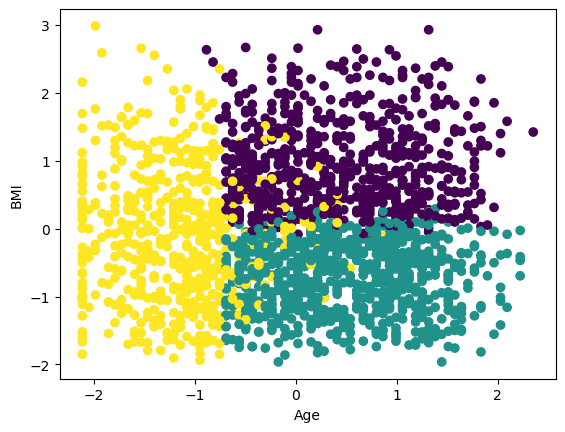

In [28]:
plt.scatter(X_scaler[:,0],X_scaler[:,4],c=df['cluster_kmeans'])
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

Как выше было проговорено, видим, как кластер распределил на 3 группы на возраст и индекс массы тела.

## AgglomerativeClustering:

In [29]:
n_cl = 3 
agglo = AgglomerativeClustering(n_clusters=n_cl).fit(X_scaler)
df['cluster_agglo'] = agglo.labels_
df_temp['cluster_agglo'] = agglo.labels_
df.head()

,PatientID,Age,Gender,State,Height_cm,Weight_kg,BMI,Insurance_Type,Primary_Condition,Num_Chronic_Conditions,Annual_Visits,Avg_Billing_Amount,Last_Visit_Date,Days_Since_Last_Visit,Preventive_Care_Flag,cluster_kmeans,cluster_agglo
0,P10000,64,Male,GA,151,115,50.4,Private,Arthritis,3,7,2995.0,2025-07-18,186,0,0,0
1,P10001,59,Male,OH,189,68,19.0,Medicare,Depression,1,8,1209.0,2025-12-12,39,0,1,2
2,P10002,58,Female,PA,156,91,37.4,Private,Asthma,1,4,999.0,2025-09-16,126,0,0,0
3,P10003,43,Female,GA,152,92,39.8,Medicare,Hypertension,1,6,5638.5,2025-04-09,286,1,0,0
4,P10004,53,Female,NC,167,51,18.3,Medicaid,Asthma,1,4,5796.0,2025-03-07,319,0,1,2


Взято 3 кластера, далее проведено обучения по стандартизированым данным и создали 'cluster_agglo' и вывели первые пять значений.

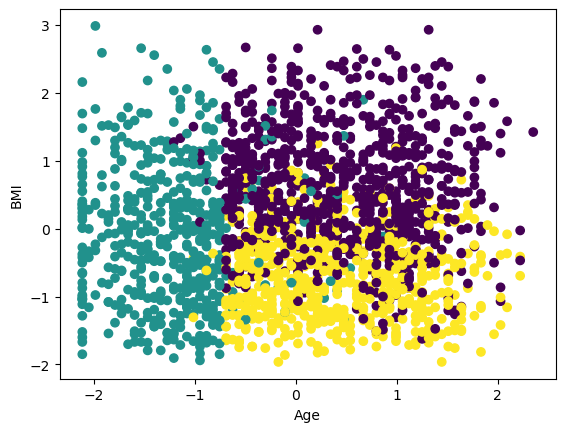

In [30]:
plt.scatter(X_scaler[:,0],X_scaler[:,4],c=df['cluster_agglo'])
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

Видим, что данный кластер распределил по другому,взято такие же признаки.

## GaussianMixture:

In [31]:
n_cl = 3 
gmm = GaussianMixture(n_components=n_cl,random_state=42).fit(X_scaler)
df['cluster_gmm'] = gmm.predict(X_scaler)
df_temp['cluster_gmm'] = gmm.predict(X_scaler)
df.head()

,PatientID,Age,Gender,State,Height_cm,Weight_kg,BMI,Insurance_Type,Primary_Condition,Num_Chronic_Conditions,Annual_Visits,Avg_Billing_Amount,Last_Visit_Date,Days_Since_Last_Visit,Preventive_Care_Flag,cluster_kmeans,cluster_agglo,cluster_gmm
0,P10000,64,Male,GA,151,115,50.4,Private,Arthritis,3,7,2995.0,2025-07-18,186,0,0,0,0
1,P10001,59,Male,OH,189,68,19.0,Medicare,Depression,1,8,1209.0,2025-12-12,39,0,1,2,1
2,P10002,58,Female,PA,156,91,37.4,Private,Asthma,1,4,999.0,2025-09-16,126,0,0,0,0
3,P10003,43,Female,GA,152,92,39.8,Medicare,Hypertension,1,6,5638.5,2025-04-09,286,1,0,0,0
4,P10004,53,Female,NC,167,51,18.3,Medicaid,Asthma,1,4,5796.0,2025-03-07,319,0,1,2,1


Также берем 3 кластера, обучаем на рандомных значениях на стандартизированных данных и создаем новое поле и выводим первые 5 значений.

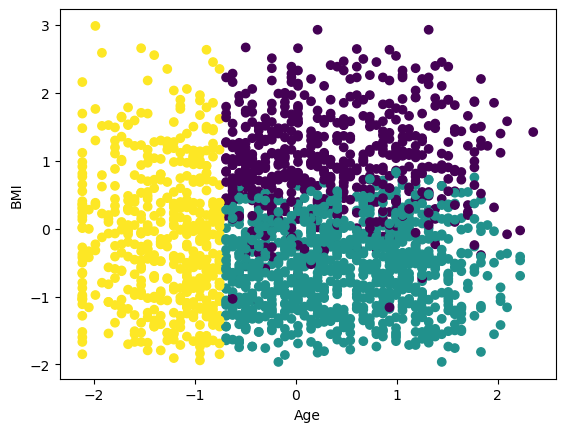

In [32]:
plt.scatter(X_scaler[:,0],X_scaler[:,4],c=df['cluster_gmm'])
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

Видим,что данный кластер очень похож на распределение первого кластера.

## Метрики

In [33]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score

### Kmeans

In [34]:
sil = silhouette_score(X_scaler,kmeans.labels_)
cal = calinski_harabasz_score(X_scaler,kmeans.labels_)
print('silhouette_score',sil)
print('calinski_harabasz_score',cal)

silhouette_score 0.1252599282599589
calinski_harabasz_score 299.98829170288155


### AgglomerativeClastering

In [35]:
sil = silhouette_score(X_scaler,agglo.labels_)
cal = calinski_harabasz_score(X_scaler,agglo.labels_)
print('silhouette_score',sil)
print('calinski_harabasz_score',cal)

silhouette_score 0.09867909712826274
calinski_harabasz_score 248.98917502201292


### GaussianMixture

In [36]:
sil = silhouette_score(X_scaler,df['cluster_gmm'])
cal = calinski_harabasz_score(X_scaler,df['cluster_gmm'])
print('silhouette_score',sil)
print('calinski_harabasz_score',cal)

silhouette_score 0.1129541827546819
calinski_harabasz_score 274.0071833092188


## Вывод по модулю

В модуле 2. Кластеризация (3 метода), метрики, визуализация.Было проделано первым делом подключение библиотек, определенние признаков, по которым будем проводить обучение.После того как были выбраны признака, проводим стандартизацию с данными и после вывели график расположение точек AGE и BMI.Далее началось обучение моделей, взяли Kmeans,AgglomerativeClastering,GaussianMixture, первом моделью обучили Kmeans, поставили ему, как количество кластеров 3 и добавли новое поле, где показывается, как кластер распределился и после выводили таблицу как распределился наш кластер, так было проделано со всеми 3 моделями, перечисленными ранее.Далее выводим метрики, для определения самой лучшей модели кластеризации,были использованы метрики calinski_harabasz_score и silhouette_score по этим метрикам взяли, как самую лучшую модель - это Kmeans.

# Модуль 3. Описание кластеров

## Kmeans

In [37]:
df[df['cluster_kmeans'] == 0].describe(include='all')

,PatientID,Age,Gender,State,Height_cm,Weight_kg,BMI,Insurance_Type,Primary_Condition,Num_Chronic_Conditions,Annual_Visits,Avg_Billing_Amount,Last_Visit_Date,Days_Since_Last_Visit,Preventive_Care_Flag,cluster_kmeans,cluster_agglo,cluster_gmm
count,653,653.000000,653,653,653.000000,653.000000,653.000000,653,653,653.000000,653.000000,653.000000,653,653.000000,653.000000,653.0,653.000000,653.000000
unique,653,NaN,2,10,NaN,NaN,NaN,3,9,NaN,NaN,NaN,309,NaN,NaN,NaN,NaN,NaN
top,P10000,NaN,Female,GA,NaN,NaN,NaN,Medicare,Anxiety,NaN,NaN,NaN,2025-11-27,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,412,79,NaN,NaN,NaN,349,87,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN
mean,NaN,57.444104,NaN,NaN,161.733538,101.954058,39.217764,NaN,NaN,1.441041,6.908116,4573.562787,NaN,180.886677,0.517611,0.0,0.228178,0.228178
std,NaN,11.177542,NaN,NaN,10.556134,12.639808,5.691512,NaN,NaN,0.754313,3.398504,2555.534243,NaN,104.819840,0.500073,0.0,0.622928,0.430796
min,NaN,37.000000,NaN,NaN,145.000000,63.000000,30.000000,NaN,NaN,0.000000,1.000000,310.500000,NaN,1.000000,0.000000,0.0,0.000000,0.000000
25%,NaN,48.000000,NaN,NaN,153.000000,92.000000,34.600000,NaN,NaN,1.000000,4.000000,2580.000000,NaN,94.000000,0.000000,0.0,0.000000,0.000000
50%,NaN,57.000000,NaN,NaN,161.000000,104.000000,38.300000,NaN,NaN,1.000000,7.000000,4483.500000,NaN,186.000000,1.000000,0.0,0.000000,0.000000
75%,NaN,67.000000,NaN,NaN,170.000000,113.000000,42.800000,NaN,NaN,2.000000,10.000000,6357.000000,NaN,268.000000,1.000000,0.0,0.000000,0.000000


Кластер 0 — это группа, полностью состоящая из людей с клиническим ожирением и высокими затратами на лечение

In [38]:
df[df['cluster_kmeans'] == 1].describe(include='all')

,PatientID,Age,Gender,State,Height_cm,Weight_kg,BMI,Insurance_Type,Primary_Condition,Num_Chronic_Conditions,Annual_Visits,Avg_Billing_Amount,Last_Visit_Date,Days_Since_Last_Visit,Preventive_Care_Flag,cluster_kmeans,cluster_agglo,cluster_gmm
count,765,765.000000,765,765,765.000000,765.000000,765.000000,765,765,765.000000,765.000000,765.000000,765,765.000000,765.000000,765.0,765.000000,765.000000
unique,765,NaN,2,10,NaN,NaN,NaN,3,9,NaN,NaN,NaN,325,NaN,NaN,NaN,NaN,NaN
top,P10001,NaN,Male,OH,NaN,NaN,NaN,Medicare,Hypertension,NaN,NaN,NaN,2025-07-15,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,446,87,NaN,NaN,NaN,425,101,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN
mean,NaN,58.526797,NaN,NaN,172.559477,72.185621,24.271634,NaN,NaN,1.475817,6.416993,4579.777778,NaN,186.159477,0.512418,1.0,1.383007,0.945098
std,NaN,10.908274,NaN,NaN,11.943505,15.297728,4.468771,NaN,NaN,0.754396,3.418072,2570.803649,NaN,105.857398,0.500173,0.0,0.920092,0.227938
min,NaN,40.000000,NaN,NaN,145.000000,50.000000,13.400000,NaN,NaN,1.000000,1.000000,306.000000,NaN,1.000000,0.000000,1.0,0.000000,0.000000
25%,NaN,49.000000,NaN,NaN,164.000000,60.000000,20.600000,NaN,NaN,1.000000,4.000000,2581.500000,NaN,93.000000,0.000000,1.0,0.000000,1.000000
50%,NaN,58.000000,NaN,NaN,173.000000,70.000000,24.600000,NaN,NaN,1.000000,6.000000,4587.500000,NaN,188.000000,1.000000,1.0,2.000000,1.000000
75%,NaN,67.000000,NaN,NaN,180.000000,82.000000,28.000000,NaN,NaN,2.000000,9.000000,6300.000000,NaN,279.000000,1.000000,1.0,2.000000,1.000000


Кластер 1 можно назвать "Возрастной группой с нормальным ИМТ". Основное внимание здесь стоит уделить профилактике сердечно-сосудистых заболеваний (гипертонии). Тот факт, что счета за лечение такие же высокие, как у группы с ожирением, подтверждает: возраст и хронические болезни стоят дорого даже при нормальном весе.

In [39]:
df[df['cluster_kmeans'] == 2].describe(include='all')

,PatientID,Age,Gender,State,Height_cm,Weight_kg,BMI,Insurance_Type,Primary_Condition,Num_Chronic_Conditions,Annual_Visits,Avg_Billing_Amount,Last_Visit_Date,Days_Since_Last_Visit,Preventive_Care_Flag,cluster_kmeans,cluster_agglo,cluster_gmm
count,582,582.000000,582,582,582.000000,582.000000,582.000000,582,582,582.000000,582.000000,582.000000,582,582.000000,582.000000,582.0,582.000000,582.000000
unique,582,NaN,2,10,NaN,NaN,NaN,4,7,NaN,NaN,NaN,293,NaN,NaN,NaN,NaN,NaN
top,P10006,NaN,Male,NC,NaN,NaN,NaN,Private,Hypertension,NaN,NaN,NaN,2025-06-29,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,312,74,NaN,NaN,NaN,203,518,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN
mean,NaN,32.829897,NaN,NaN,168.719931,83.314433,29.732474,NaN,NaN,0.154639,2.599656,2595.317010,NaN,171.201031,0.340206,2.0,0.989691,1.795533
std,NaN,8.505962,NaN,NaN,12.998434,20.018385,8.328763,NaN,NaN,0.361871,1.314372,1437.954799,NaN,102.540362,0.474186,0.0,0.361528,0.512609
min,NaN,18.000000,NaN,NaN,145.000000,50.000000,13.600000,NaN,NaN,0.000000,1.000000,207.000000,NaN,1.000000,0.000000,2.0,0.000000,0.000000
25%,NaN,27.000000,NaN,NaN,158.000000,65.250000,23.325000,NaN,NaN,0.000000,2.000000,1397.750000,NaN,82.000000,0.000000,2.0,1.000000,2.000000
50%,NaN,33.000000,NaN,NaN,169.000000,83.000000,29.200000,NaN,NaN,0.000000,3.000000,2597.000000,NaN,165.000000,0.000000,2.0,1.000000,2.000000
75%,NaN,38.000000,NaN,NaN,178.000000,99.750000,34.875000,NaN,NaN,0.000000,4.000000,3738.000000,NaN,249.000000,1.000000,2.0,1.000000,2.000000


Кластер 2 — это "Группа профилактического наблюдения". Эти пациенты не требуют дорогостоящего лечения прямо сейчас. Для клиники это сегмент, который «платит взносы, но не тратит ресурсы». Основная стратегия работы с ними — удержание через профилактику и чек-апы, чтобы они как можно дольше не перешли в «тяжелые» кластеры 0 или 1.

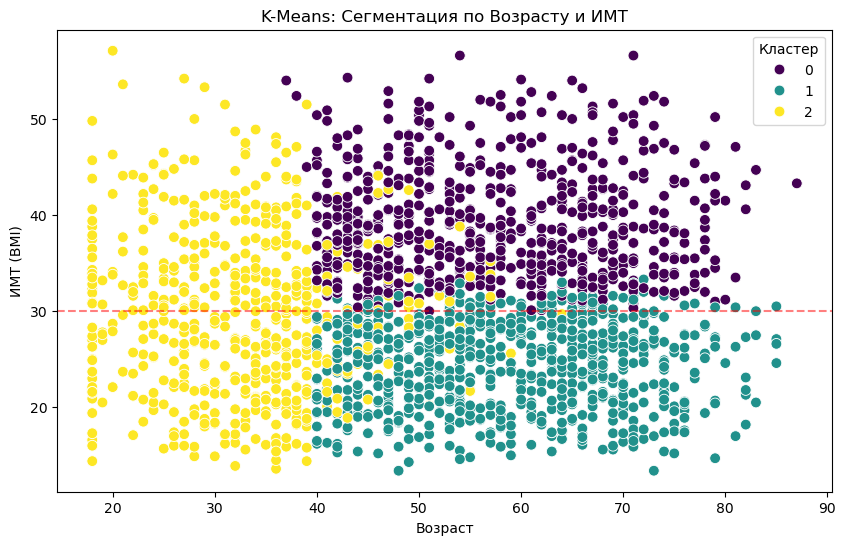

In [64]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='BMI', hue='cluster_kmeans', data=df, palette='viridis', s=60)
plt.title('K-Means: Сегментация по Возрасту и ИМТ')
plt.xlabel('Возраст')
plt.ylabel('ИМТ (BMI)')
plt.legend(title='Кластер')
plt.axhline(y=30, color='red', linestyle='--', alpha=0.5, label='Граница ожирения') 
plt.show()

## AgglomerativeClastering

In [40]:
df[df['cluster_agglo']==0].describe(include='all')

,PatientID,Age,Gender,State,Height_cm,Weight_kg,BMI,Insurance_Type,Primary_Condition,Num_Chronic_Conditions,Annual_Visits,Avg_Billing_Amount,Last_Visit_Date,Days_Since_Last_Visit,Preventive_Care_Flag,cluster_kmeans,cluster_agglo,cluster_gmm
count,847,847.000000,847,847,847.00000,847.000000,847.000000,847,847,847.000000,847.000000,847.000000,847,847.000000,847.000000,847.000000,847.0,847.000000
unique,847,NaN,2,10,NaN,NaN,NaN,3,9,NaN,NaN,NaN,329,NaN,NaN,NaN,NaN,NaN
top,P10000,NaN,Male,GA,NaN,NaN,NaN,Medicare,Hypertension,NaN,NaN,NaN,2025-11-27,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,438,103,NaN,NaN,NaN,470,123,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN
mean,NaN,57.726092,NaN,NaN,166.42503,98.585596,36.133058,NaN,NaN,1.486423,6.553719,4789.285714,NaN,170.778040,0.545455,0.371901,0.0,0.451004
std,NaN,11.286745,NaN,NaN,12.97784,15.051588,7.444921,NaN,NaN,0.789705,3.425552,2751.439503,NaN,103.868042,0.498224,0.575146,0.0,0.518815
min,NaN,32.000000,NaN,NaN,145.00000,52.000000,16.400000,NaN,NaN,0.000000,1.000000,310.500000,NaN,1.000000,0.000000,0.000000,0.0,0.000000
25%,NaN,48.000000,NaN,NaN,155.50000,89.000000,30.750000,NaN,NaN,1.000000,4.000000,2693.250000,NaN,80.500000,0.000000,0.000000,0.0,0.000000
50%,NaN,58.000000,NaN,NaN,166.00000,101.000000,35.600000,NaN,NaN,1.000000,7.000000,4696.500000,NaN,168.000000,1.000000,0.000000,0.0,0.000000
75%,NaN,67.000000,NaN,NaN,176.00000,111.000000,40.900000,NaN,NaN,2.000000,9.000000,6554.250000,NaN,254.000000,1.000000,1.000000,0.0,1.000000


Аггломеративная кластеризация показала более высокую чувствительность к финансовым затратам. Кластер 0 в этой модели объединил самых дорогостоящих пациентов, для которых характерны возраст 55+ и гипертония, независимо от того, насколько критичен их ИМТ

In [41]:
df[df['cluster_agglo']==1].describe(include='all')

,PatientID,Age,Gender,State,Height_cm,Weight_kg,BMI,Insurance_Type,Primary_Condition,Num_Chronic_Conditions,Annual_Visits,Avg_Billing_Amount,Last_Visit_Date,Days_Since_Last_Visit,Preventive_Care_Flag,cluster_kmeans,cluster_agglo,cluster_gmm
count,523,523.000000,523,523,523.000000,523.000000,523.000000,523,523,523.000000,523.000000,523.000000,523,523.000000,523.000000,523.000000,523.0,523.000000
unique,523,NaN,2,10,NaN,NaN,NaN,4,5,NaN,NaN,NaN,284,NaN,NaN,NaN,NaN,NaN
top,P10006,NaN,Male,NC,NaN,NaN,NaN,Medicaid,Hypertension,NaN,NaN,NaN,2025-06-29,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,270,65,NaN,NaN,NaN,182,494,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN
mean,NaN,31.707457,NaN,NaN,168.843212,83.349904,29.787954,NaN,NaN,0.078394,2.539197,2612.586998,NaN,173.843212,0.328872,1.946463,1.0,1.898662
std,NaN,8.121708,NaN,NaN,12.963044,20.372817,8.780032,NaN,NaN,0.269048,1.154656,1438.878704,NaN,103.631801,0.470253,0.304818,0.0,0.370433
min,NaN,18.000000,NaN,NaN,145.000000,50.000000,13.600000,NaN,NaN,0.000000,1.000000,207.000000,NaN,1.000000,0.000000,0.000000,1.0,0.000000
25%,NaN,26.000000,NaN,NaN,158.000000,65.000000,22.650000,NaN,NaN,0.000000,2.000000,1402.000000,NaN,82.000000,0.000000,2.000000,1.0,2.000000
50%,NaN,32.000000,NaN,NaN,169.000000,83.000000,29.000000,NaN,NaN,0.000000,3.000000,2633.000000,NaN,173.000000,0.000000,2.000000,1.0,2.000000
75%,NaN,37.000000,NaN,NaN,178.000000,100.500000,35.400000,NaN,NaN,0.000000,3.000000,3789.500000,NaN,252.000000,1.000000,2.000000,1.0,2.000000


Кластер 1 в аггломеративной модели представляет собой группу молодых пациентов (средний возраст 31 год) с практически полным отсутствием хронических заболеваний (среднее — 0.07). Несмотря на то, что их ИМТ (29.7) находится на верхней границе нормы, это самая экономически выгодная группа для клиники: средний чек составляет всего 2612$, что в два раза меньше, чем в "старших" кластерах. Данный алгоритм практически на 100% повторил результат K-Means для молодежи, что подтверждает уникальность и стабильность этого сегмента в данных

In [42]:
df[df['cluster_agglo']==2].describe(include='all')

,PatientID,Age,Gender,State,Height_cm,Weight_kg,BMI,Insurance_Type,Primary_Condition,Num_Chronic_Conditions,Annual_Visits,Avg_Billing_Amount,Last_Visit_Date,Days_Since_Last_Visit,Preventive_Care_Flag,cluster_kmeans,cluster_agglo,cluster_gmm
count,630,630.000000,630,630,630.000000,630.000000,630.000000,630,630,630.000000,630.000000,630.000000,630,630.000000,630.000000,630.000000,630.0,630.000000
unique,630,NaN,2,10,NaN,NaN,NaN,3,9,NaN,NaN,NaN,294,NaN,NaN,NaN,NaN,NaN
top,P10001,NaN,Female,OH,NaN,NaN,NaN,Medicare,Hypertension,NaN,NaN,NaN,2025-07-15,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,339,71,NaN,NaN,NaN,331,88,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN
mean,NaN,57.006349,NaN,NaN,169.123810,68.560317,24.281746,NaN,NaN,1.365079,6.434921,4091.480952,NaN,197.779365,0.466667,0.946032,2.0,0.860317
std,NaN,11.213776,NaN,NaN,11.839973,12.251940,5.303810,NaN,NaN,0.695239,3.474832,2221.465786,NaN,104.617042,0.499284,0.403019,0.0,0.364803
min,NaN,35.000000,NaN,NaN,145.000000,50.000000,13.400000,NaN,NaN,0.000000,1.000000,306.000000,NaN,1.000000,0.000000,0.000000,2.0,0.000000
25%,NaN,47.000000,NaN,NaN,160.000000,59.000000,20.225000,NaN,NaN,1.000000,4.000000,2239.875000,NaN,107.250000,0.000000,1.000000,2.0,1.000000
50%,NaN,55.000000,NaN,NaN,169.000000,67.000000,23.950000,NaN,NaN,1.000000,7.000000,4088.250000,NaN,204.500000,0.000000,1.000000,2.0,1.000000
75%,NaN,66.000000,NaN,NaN,177.000000,77.000000,27.700000,NaN,NaN,2.000000,9.000000,5856.750000,NaN,292.000000,1.000000,1.000000,2.0,1.000000


Кластер 2 в аггломеративной модели выделил категорию пожилых пациентов с нормальным индексом массы тела. Анализ показывает, что даже при отсутствии ожирения, возрастная группа 55+ требует значительных медицинских затрат (свыше 4000$) из-за хронических заболеваний, таких как гипертония. Этот кластер практически полностью совпадает с Кластером 1 из метода K-Means, что доказывает точность разделения пациентов по совокупности факторов "возраст + вес"

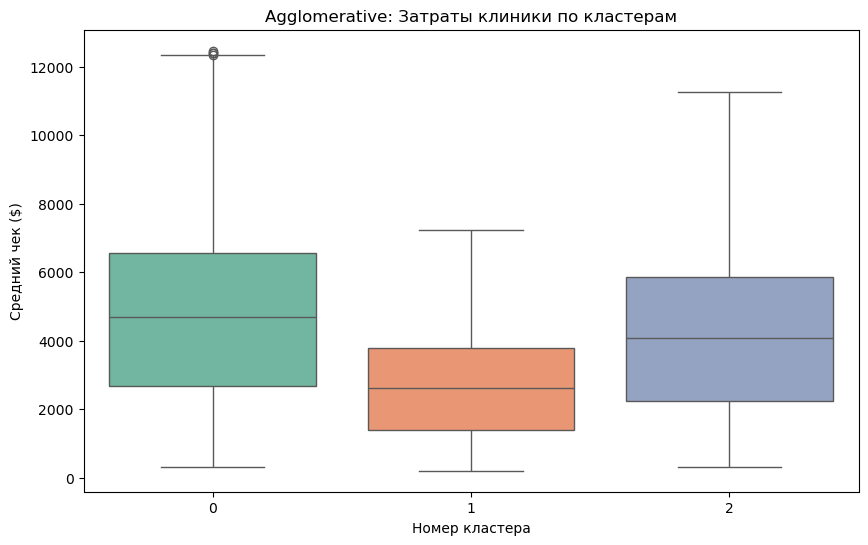

In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster_agglo', y='Avg_Billing_Amount', data=df, hue='cluster_agglo', palette='Set2', legend=False)
plt.title('Agglomerative: Затраты клиники по кластерам')
plt.xlabel('Номер кластера')
plt.ylabel('Средний чек ($)')
plt.show()

## GaussianMixture

In [43]:
df[df['cluster_gmm']==0].describe(include='all')

,PatientID,Age,Gender,State,Height_cm,Weight_kg,BMI,Insurance_Type,Primary_Condition,Num_Chronic_Conditions,Annual_Visits,Avg_Billing_Amount,Last_Visit_Date,Days_Since_Last_Visit,Preventive_Care_Flag,cluster_kmeans,cluster_agglo,cluster_gmm
count,578,578.000000,578,578,578.000000,578.000000,578.000000,578,578,578.000000,578.000000,578.000000,578,578.000000,578.000000,578.000000,578.00000,578.0
unique,578,NaN,2,10,NaN,NaN,NaN,3,9,NaN,NaN,NaN,294,NaN,NaN,NaN,NaN,NaN
top,P10000,NaN,Female,GA,NaN,NaN,NaN,Medicare,Hypertension,NaN,NaN,NaN,2025-11-27,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,350,69,NaN,NaN,NaN,300,89,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN
mean,NaN,56.621107,NaN,NaN,157.576125,98.074394,39.526817,NaN,NaN,1.397924,6.430796,4442.105536,NaN,181.060554,0.474048,0.173010,0.33910,0.0
std,NaN,11.295160,NaN,NaN,7.615449,15.852210,6.223678,NaN,NaN,0.709526,3.366604,2550.378478,NaN,104.532854,0.499759,0.493807,0.73715,0.0
min,NaN,40.000000,NaN,NaN,145.000000,50.000000,20.500000,NaN,NaN,1.000000,1.000000,310.500000,NaN,1.000000,0.000000,0.000000,0.00000,0.0
25%,NaN,47.000000,NaN,NaN,151.000000,87.000000,35.500000,NaN,NaN,1.000000,4.000000,2479.125000,NaN,94.000000,0.000000,0.000000,0.00000,0.0
50%,NaN,55.000000,NaN,NaN,156.000000,100.500000,39.100000,NaN,NaN,1.000000,6.000000,4368.750000,NaN,181.500000,0.000000,0.000000,0.00000,0.0
75%,NaN,66.000000,NaN,NaN,163.000000,112.000000,43.650000,NaN,NaN,2.000000,9.000000,6290.250000,NaN,267.500000,1.000000,0.000000,0.00000,0.0


Модель GMM в Кластере 0 выделила наиболее однородную группу по признаку лишнего веса. Средний BMI 39.5 указывает на то, что алгоритм сфокусировался на физическом состоянии пациентов как на главном факторе разделения. Данный сегмент характеризуется высокой стоимостью лечения и преобладанием гипертонии, что делает его приоритетным для программ снижения веса и мониторинга сердечно-сосудистой системы

In [44]:
df[df['cluster_gmm']==1].describe(include='all')

,PatientID,Age,Gender,State,Height_cm,Weight_kg,BMI,Insurance_Type,Primary_Condition,Num_Chronic_Conditions,Annual_Visits,Avg_Billing_Amount,Last_Visit_Date,Days_Since_Last_Visit,Preventive_Care_Flag,cluster_kmeans,cluster_agglo,cluster_gmm
count,927,927.000000,927,927,927.000000,927.000000,927.000000,927,927,927.000000,927.000000,927.000000,927,927.000000,927.000000,927.000000,927.000000,927.0
unique,927,NaN,2,10,NaN,NaN,NaN,3,9,NaN,NaN,NaN,340,NaN,NaN,NaN,NaN,NaN
top,P10001,NaN,Male,CA,NaN,NaN,NaN,Medicare,Obesity,NaN,NaN,NaN,2025-12-25,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,512,105,NaN,NaN,NaN,505,121,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN
mean,NaN,57.837109,NaN,NaN,173.932039,78.002157,25.718554,NaN,NaN,1.458468,6.443366,4473.398058,NaN,182.995685,0.518878,0.911543,1.183387,1.0
std,NaN,10.977613,NaN,NaN,10.898943,19.064515,5.399568,NaN,NaN,0.753789,3.511286,2571.613996,NaN,105.289983,0.499913,0.460944,0.967520,0.0
min,NaN,40.000000,NaN,NaN,145.000000,50.000000,13.400000,NaN,NaN,1.000000,1.000000,306.000000,NaN,1.000000,0.000000,0.000000,0.000000,1.0
25%,NaN,48.000000,NaN,NaN,167.000000,62.000000,21.400000,NaN,NaN,1.000000,3.000000,2446.250000,NaN,91.000000,0.000000,1.000000,0.000000,1.0
50%,NaN,57.000000,NaN,NaN,174.000000,75.000000,25.800000,NaN,NaN,1.000000,6.000000,4342.500000,NaN,187.000000,1.000000,1.000000,2.000000,1.0
75%,NaN,67.000000,NaN,NaN,180.000000,92.000000,29.700000,NaN,NaN,2.000000,9.000000,6205.500000,NaN,272.000000,1.000000,1.000000,2.000000,1.0


Кластер 1 в модели GMM выделил группу пожилых пациентов с нормальным и умеренным ИМТ. Интересно, что финансовые затраты в этом кластере практически идентичны "группе ожирения" (Кластер 0). Это позволяет сделать вывод, что в данной выборке возраст пациента влияет на стоимость медицинских услуг сильнее, чем индекс массы тела. Модель GMM эффективно отделила физиологический фактор (вес) от возрастного

In [45]:
df[df['cluster_gmm']==2].describe(include='all')

,PatientID,Age,Gender,State,Height_cm,Weight_kg,BMI,Insurance_Type,Primary_Condition,Num_Chronic_Conditions,Annual_Visits,Avg_Billing_Amount,Last_Visit_Date,Days_Since_Last_Visit,Preventive_Care_Flag,cluster_kmeans,cluster_agglo,cluster_gmm
count,495,495.000000,495,495,495.000000,495.000000,495.000000,495,495,495.0,495.000000,495.000000,495,495.000000,495.000000,495.000000,495.000000,495.0
unique,495,NaN,2,10,NaN,NaN,NaN,4,1,NaN,NaN,NaN,277,NaN,NaN,NaN,NaN,NaN
top,P10006,NaN,Male,NC,NaN,NaN,NaN,Medicaid,Hypertension,NaN,NaN,NaN,2025-01-25,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,259,59,NaN,NaN,NaN,170,495,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN
mean,NaN,30.402020,NaN,NaN,168.688889,83.418182,29.886263,NaN,NaN,0.0,2.511111,2598.311111,NaN,173.494949,0.349495,1.987879,0.989899,2.0
std,NaN,6.393158,NaN,NaN,12.925361,20.309570,8.828389,NaN,NaN,0.0,1.092567,1393.221546,NaN,103.657132,0.477293,0.155384,0.161906,0.0
min,NaN,18.000000,NaN,NaN,145.000000,50.000000,13.600000,NaN,NaN,0.0,1.000000,207.000000,NaN,1.000000,0.000000,0.000000,0.000000,2.0
25%,NaN,26.000000,NaN,NaN,158.500000,65.000000,22.800000,NaN,NaN,0.0,2.000000,1449.000000,NaN,82.000000,0.000000,2.000000,1.000000,2.0
50%,NaN,32.000000,NaN,NaN,169.000000,83.000000,29.400000,NaN,NaN,0.0,3.000000,2666.000000,NaN,170.000000,0.000000,2.000000,1.000000,2.0
75%,NaN,36.000000,NaN,NaN,178.000000,100.000000,35.500000,NaN,NaN,0.0,3.000000,3765.500000,NaN,252.000000,1.000000,2.000000,1.000000,2.0


Кластер 2 в модели GMM представляет собой эталонный сегмент молодых и здоровых пациентов. Уникальность работы данного алгоритма проявилась в том, что он единственный смог выделить группу с нулевым показателем хронических заболеваний. Это наиболее стабильный и низкорисковый сегмент, который приносит клинике стабильный доход при минимальных затратах на обслуживание

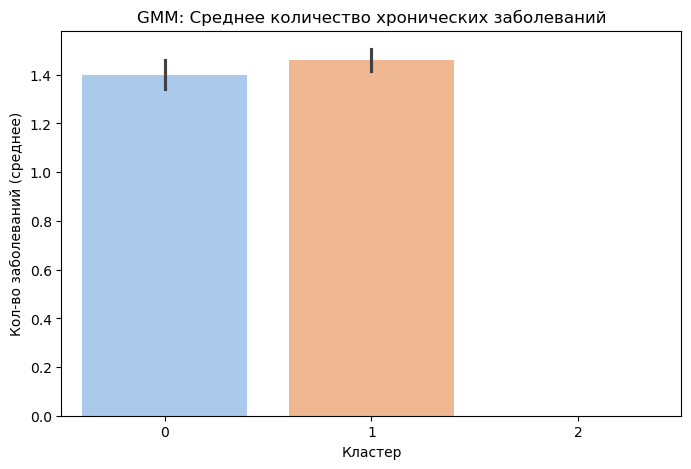

In [67]:
plt.figure(figsize=(8, 5))
# Показываем среднее кол-во хронических заболеваний в каждом кластере
sns.barplot(x='cluster_gmm', y='Num_Chronic_Conditions', data=df, hue='cluster_gmm', palette='pastel', legend=False)
plt.title('GMM: Среднее количество хронических заболеваний')
plt.xlabel('Кластер')
plt.ylabel('Кол-во заболеваний (среднее)')
plt.show()

Мы видим, что Кластер 2 имеет практически нулевой столбец заболеваний. Это подтверждает, что модель GMM успешно выделила абсолютно здоровых пациентов

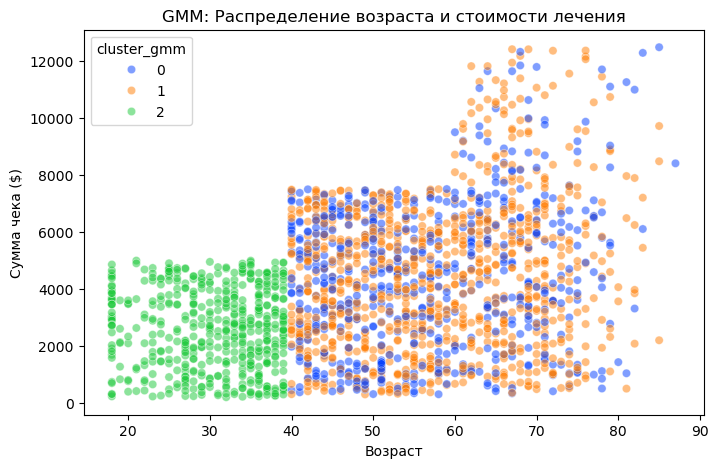

In [69]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Avg_Billing_Amount', hue='cluster_gmm', data=df, palette='bright', alpha=0.5)
plt.title('GMM: Распределение возраста и стоимости лечения')
plt.xlabel('Возраст')
plt.ylabel('Сумма чека ($)')
plt.show()

Точки Кластера 1 и Кластера 0 находятся на одной высоте по оси Y (стоимость), хотя по возрасту Кластер 1 старше. Это доказывает, что возраст влияет на чек сильнее веса

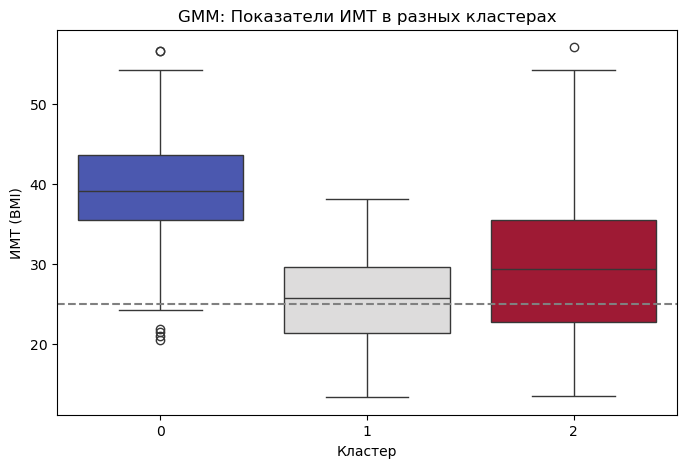

In [70]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='cluster_gmm', y='BMI', data=df, hue='cluster_gmm', palette='coolwarm', legend=False)
plt.title('GMM: Показатели ИМТ в разных кластерах')
plt.xlabel('Кластер')
plt.ylabel('ИМТ (BMI)')
plt.axhline(y=25, color='gray', linestyle='--', label='Норма') 
plt.show()

Здесь видно, что в Кластере 1 значения ИМТ находятся в пределах нормы, что подтверждает эффективность GMM в разделении факторов веса и возраста

## Вывод по модулю

В Модуле 3. Описание кластеров,было проделан работа по описанию кластеров.Для каждого кластера в разных моделяха было выведена статистика, по которой определяем, куда какой кластер распределился.В основном кластеры одинаково распределили, только в разной последовательности: в принципе молодые люди, которые тратят на больницу не так много денег на лечения, чтобы к старости иметь меньше болезней и не тратиться сильно;старые люди с нормальными показателями индкса массы тела, но они также тратят очень много денег на лечения своих болезней;последний тип людей это люди с большим ожирение, которые тратят также много денег и что и пожилые и подводим, то что кластеры распределил примерно одинаково, но разной последовательности.

# Модуль 4. Создание модели классификации (3 метода) с метриками

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,roc_auc_score
import joblib

In [47]:
y = df['cluster_kmeans']
X= df_temp[fuature]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

Размер обучающей выборки: (1600, 12)
Размер тестовой выборки: (400, 12)


## KNeighborsClassifier

In [48]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [49]:
y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)
print("---Метрики для KNN---")
print(classification_report(y_test,y_pred_knn))

---Метрики для KNN---
              precision    recall  f1-score   support

           0       0.48      0.48      0.48       131
           1       0.52      0.57      0.55       153
           2       0.53      0.47      0.50       116

    accuracy                           0.51       400
   macro avg       0.51      0.51      0.51       400
weighted avg       0.51      0.51      0.51       400



In [50]:
#TODO: тут короче тоже рассписать как у нас распределены

In [51]:
roc_auc_rf = roc_auc_score(y_test,y_prob_knn,multi_class='ovr')
print(f"ROC-AUG Score для Random Forest:{roc_auc_rf:.4f}")

ROC-AUG Score для Random Forest:0.7050


In [52]:
# тут пока не знаю вот рог кривая, но я вот сделал текстом, возможно нужно будел лучше картинкой типо чтоб было больше картинок и рассписать тоже

##  RandomForestClasifie

In [53]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [54]:
y_pred_rf = rfc.predict(X_test)
y_prob_rf = rfc.predict_proba(X_test)
print("--Метрика для Random Forest--")
print(classification_report(y_test,y_pred_rf))

--Метрика для Random Forest--
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       131
           1       0.92      0.99      0.95       153
           2       1.00      0.87      0.93       116

    accuracy                           0.94       400
   macro avg       0.95      0.94      0.94       400
weighted avg       0.95      0.94      0.94       400



In [55]:
roc_auc_rf = roc_auc_score(y_test,y_prob_rf,multi_class='ovr')
print(f"ROC-AUG Score для Random Forest:{roc_auc_rf:.4f}")

ROC-AUG Score для Random Forest:0.9954


## Logistic Regression

In [56]:
lrn = LogisticRegression(max_iter=1000)
lrn.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [57]:
y_pred_lrn = lrn.predict(X_test)
y_prob_lrn = lrn.predict_proba(X_test)
print("--Метрика для Logistic Regression---")
print(classification_report(y_test,y_pred_lrn))

--Метрика для Logistic Regression---
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       131
           1       0.94      0.93      0.94       153
           2       0.97      0.97      0.97       116

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



In [58]:
roc_auc_lr = roc_auc_score(y_test,y_prob_lrn,multi_class='ovr')
print(f"ROC-AUC Score для Logistic Regression: {roc_auc_lr:.4f}")

ROC-AUC Score для Logistic Regression: 0.9970


In [59]:
import joblib
joblib.dump(lrn,'best_model.pkl')
print('Успешно сохранили модель')

Успешно сохранили модель


In [60]:
df.to_csv('HospitalWork.csv',index=False)  

## Вывод по модулю

# Построить интерактивный дашборд (5 визуализацией, 3 фильтра).

## Вывод по модулю

# Использование локального репозитория, github.

## Вывод по модулю

# Общий вывод

In [61]:
# Тут короче нужно будет объедиить все выводы каждого модуля